In [27]:
import mysql.connector
import pandas as pd

# Conexión a la base de datos
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='l3o.%data546.',
    database='starbucks_gold'
)

print('Conexión exitosa a la base de datos starbucks_gold')


Conexión exitosa a la base de datos starbucks_gold


In [28]:
# Mostrar las tablas de la base de datos
cursor = conn.cursor()
cursor.execute('SHOW TABLES')
tables = cursor.fetchall()
print('Tablas en la base de datos starbucks_gold:')
for table in tables:
    print(table[0])


Tablas en la base de datos starbucks_gold:
clientes_app
clientes_recurrentes
tiempo_entrega
ventas_categoria
ventas_dia_semana
ventas_edad
ventas_jornada
ventas_sucursal


In [29]:
# EDA de la tabla de ventas: ventas_dia_semana

# Consulta SQL para obtener los datos
query = "SELECT * FROM ventas_dia_semana"
df = pd.read_sql(query, conn)

# Mostrar las primeras filas
print('Primeras filas de la tabla:')
print(df.head())

# Información general
print('\nInformación de la tabla:')
df.info()

# Estadísticas descriptivas
print('\nEstadísticas descriptivas:')
print(df.describe(include='all'))

# Conteo de valores nulos
print('\nValores nulos por columna:')
print(df.isnull().sum())

# Distribución de ventas por día de la semana (si existe la columna correspondiente)
if 'dia_semana' in df.columns:
    print('\nDistribución de ventas por día de la semana:')
    print(df['dia_semana'].value_counts())

# Distribución de ventas por día de la semana
print('\nDistribución de ventas por día de la semana:')
print(df.groupby(df.columns[2]).agg({  # Asumiendo que la columna 2 es día de la semana
    df.columns[3]: ['count', 'sum', 'mean'],  # Asumiendo que la columna 3 es cantidad de ventas
    df.columns[4]: 'mean'  # Asumiendo que la columna 4 es porcentaje
}).round(2))

# Ventas totales por día de la semana
print('\nVentas totales por día de la semana:')
ventas_por_dia = df.groupby(df.columns[2])[df.columns[3]].sum().sort_values(ascending=False)
print(ventas_por_dia)

# Promedio de ventas por día de la semana
print('\nPromedio de ventas por día de la semana:')
promedio_por_dia = df.groupby(df.columns[2])[df.columns[3]].mean().sort_values(ascending=False)
print(promedio_por_dia.round(2))

# Análisis temporal si hay columna de fecha
if len(df.columns) >= 2:
    print('\nAnálisis temporal (primeras y últimas fechas):')
    print(f"Primera fecha: {df[df.columns[1]].min()}")
    print(f"Última fecha: {df[df.columns[1]].max()}")
    print(f"Período de análisis: {df[df.columns[1]].nunique()} fechas únicas")


Primeras filas de la tabla:
   id_analisis      semana dia_semana  ventas  porcentaje fecha_registro
0            1  2025-03-03    Domingo      18       34.62     2025-06-17
1            2  2025-03-03     Sábado      20       38.46     2025-06-17
2            3  2025-03-03    Viernes      14       26.92     2025-06-17
3            4  2025-03-10    Domingo      18       15.65     2025-06-17
4            5  2025-03-10     Jueves      10        8.70     2025-06-17

Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_analisis     61 non-null     int64  
 1   semana          61 non-null     object 
 2   dia_semana      61 non-null     object 
 3   ventas          61 non-null     int64  
 4   porcentaje      61 non-null     float64
 5   fecha_registro  61 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory

C:\Users\lmata\AppData\Local\Temp\ipykernel_8108\783902667.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


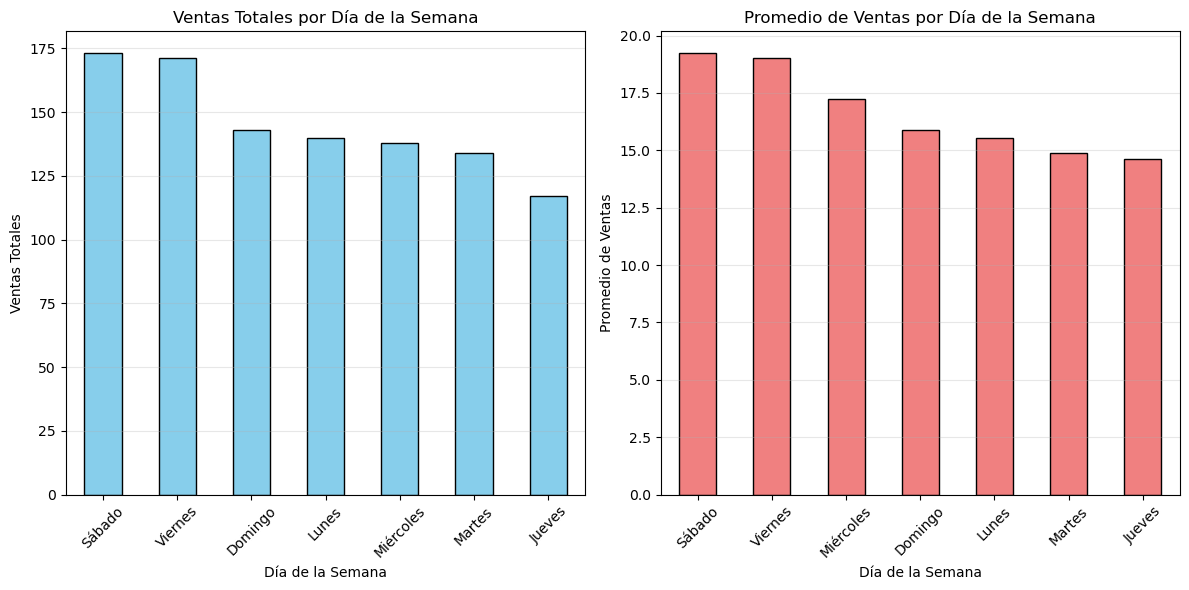

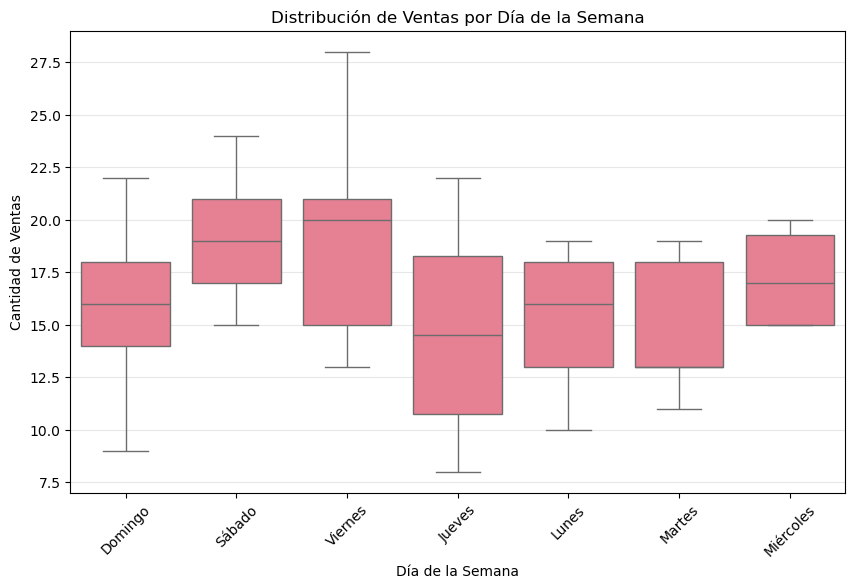

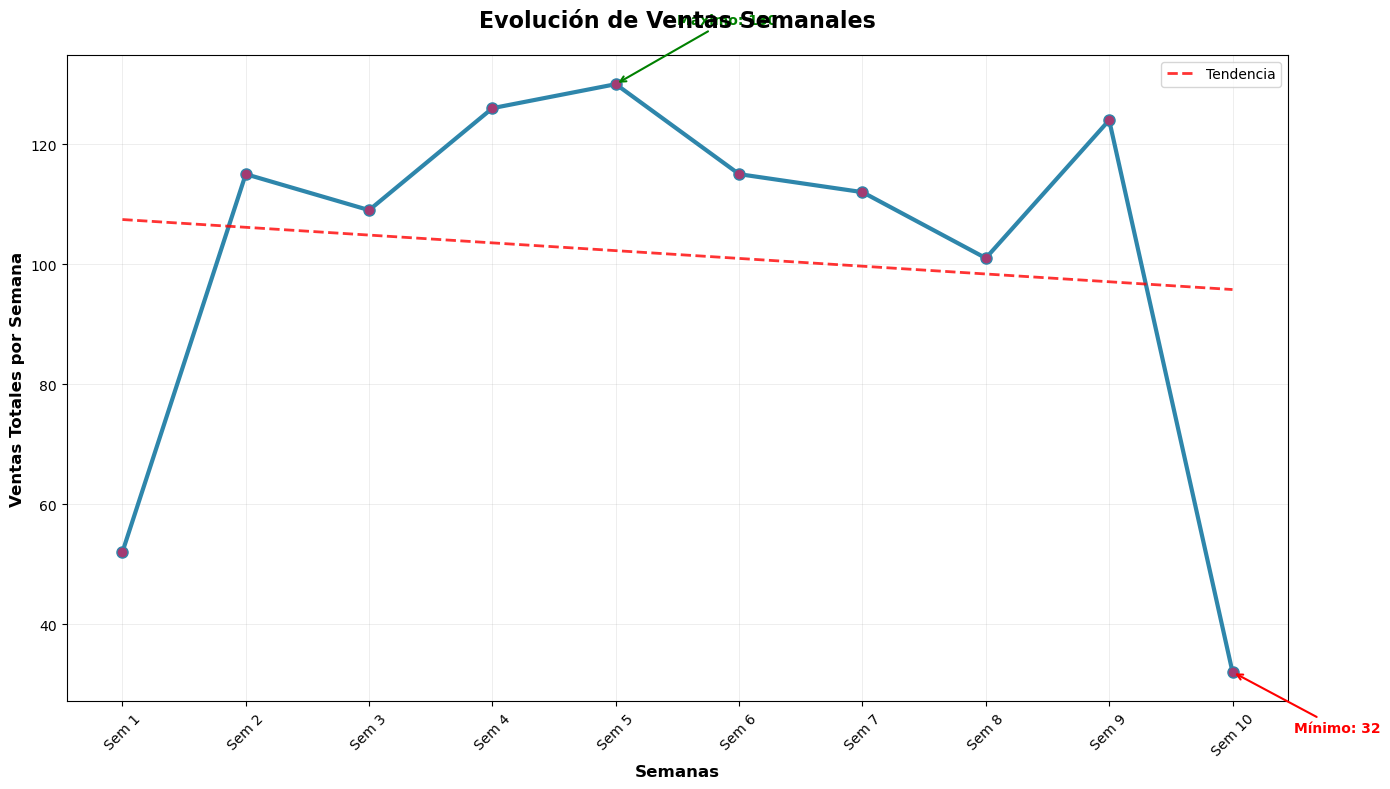


📊 RESUMEN DE TENDENCIA SEMANAL:
• Total de semanas analizadas: 10
• Ventas promedio por semana: 101.6
• Semana con más ventas: Semana 5 (130 ventas)
• Semana con menos ventas: Semana 10 (32 ventas)
• Diferencia máx-mín: 98 ventas
• 📉 Tendencia general: DECRECIENTE (-1.30 ventas/semana)


In [30]:
# Visualizaciones del EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Gráfico de barras: Ventas por día de la semana
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ventas_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
promedio_por_dia.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Promedio de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplot para ver la distribución de ventas por día
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df.columns[2], y=df.columns[3])
plt.title('Distribución de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Gráfico de línea para tendencia temporal más fácil de entender
if len(df.columns) >= 2:
    df_temp = df.copy()
    df_temp[df.columns[1]] = pd.to_datetime(df_temp[df.columns[1]])

    # Agrupar por semana para simplificar la visualización
    df_temp['semana'] = df_temp[df.columns[1]].dt.to_period('W')
    ventas_semanales = df_temp.groupby('semana')[df.columns[3]].sum()

    plt.figure(figsize=(14, 8))

    # Gráfico principal con línea más gruesa y puntos más grandes
    plt.plot(range(len(ventas_semanales)), ventas_semanales.values,
             marker='o', linewidth=3, markersize=8, color='#2E86AB', markerfacecolor='#A23B72')

    # Agregar línea de tendencia
    from numpy import polyfit, poly1d
    x = range(len(ventas_semanales))
    z = polyfit(x, ventas_semanales.values, 1)
    p = poly1d(z)
    plt.plot(x, p(x), "--", color='red', alpha=0.8, linewidth=2, label='Tendencia')

    # Mejorar el formato del gráfico
    plt.title('Evolución de Ventas Semanales', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Semanas', fontsize=12, fontweight='bold')
    plt.ylabel('Ventas Totales por Semana', fontsize=12, fontweight='bold')

    # Personalizar los ticks del eje X
    semanas_labels = [f"Sem {i+1}" for i in range(len(ventas_semanales))]
    plt.xticks(range(len(ventas_semanales)), semanas_labels, rotation=45)

    # Agregar grilla y leyenda
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    plt.legend(fontsize=10)

    # Agregar anotaciones en puntos máximos y mínimos
    max_idx = ventas_semanales.idxmax()
    min_idx = ventas_semanales.idxmin()
    max_val = ventas_semanales.max()
    min_val = ventas_semanales.min()

    max_pos = list(ventas_semanales.index).index(max_idx)
    min_pos = list(ventas_semanales.index).index(min_idx)

    plt.annotate(f'Máximo: {max_val}',
                xy=(max_pos, max_val),
                xytext=(max_pos+0.5, max_val+10),
                arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
                fontsize=10, color='green', fontweight='bold')

    plt.annotate(f'Mínimo: {min_val}',
                xy=(min_pos, min_val),
                xytext=(min_pos+0.5, min_val-10),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                fontsize=10, color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Resumen estadístico del gráfico
    print(f"\n📊 RESUMEN DE TENDENCIA SEMANAL:")
    print(f"• Total de semanas analizadas: {len(ventas_semanales)}")
    print(f"• Ventas promedio por semana: {ventas_semanales.mean():.1f}")
    print(f"• Semana con más ventas: Semana {max_pos+1} ({max_val} ventas)")
    print(f"• Semana con menos ventas: Semana {min_pos+1} ({min_val} ventas)")
    print(f"• Diferencia máx-mín: {max_val - min_val} ventas")

    if z[0] > 0:
        print(f"• 📈 Tendencia general: CRECIENTE ({z[0]:.2f} ventas/semana)")
    else:
        print(f"• 📉 Tendencia general: DECRECIENTE ({z[0]:.2f} ventas/semana)")

